#Importaciones Iniciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

### **1. Importaciones Iniciales**

In [ ]:
#Importaciones Iniciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import re
import datetime 

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/daily_dataset.csv')
data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


### **2. Inspeccion Inicial de la Data**

In [ ]:
#Inspeccion Inicial de la Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB
None


In [ ]:
data.shape

(3510433, 9)

In [ ]:
#Este dataset contiene: 
# 0   LCLid          object  =>Id del medidor instalado en el bloque/Casa?                            Var Obj
# 1   day            object  =>Dia de la medicion                                                     Var Obj
# 2   energy_median  float64 =>Mediana de la energia consumida durante el dia registrado              Var Continua
# 3   energy_mean    float64 =>Media de la energia consumida durante el dia registrado                Var Continua
# 4   energy_max     float64 =>Max de la energia consumida durante el dia registrado                  Var Continua
# 5   energy_count   int64   =>Numero de registros tomados durante el dia (cada 30 min son 48 al dia) Var Discreta
# 6   energy_std     float64 =>Desviacion Std                                                         Var Continua
# 7   energy_sum     float64 =>Suma del consumo diario                                                Var Continua
# 8   energy_min     float64 =>Max de la energia consumida durante el dia registrado                  Var Continua

In [ ]:
data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

In [ ]:
data.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.499102e+06,3.510403e+06,3.510403e+06
mean,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.726673e-01,1.012414e+01,5.962578e-02
std,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531208e-01,9.128793e+00,8.701312e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.911626e-02,4.682000e+00,2.000000e-02
50%,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.327910e-01,7.815000e+00,3.900000e-02
75%,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.293124e-01,1.256900e+01,7.100000e-02
max,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00


In [ ]:
#Analizar los Nulos 
null_cols = data.isnull().sum()
null_cols

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

In [ ]:
#Analizar por que los datos son Nulos en la columna Energy_STD
null_displ = data[data['energy_std'].isnull() == True]
null_displ

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
806,MAC000131,2014-02-28,0.075,0.075,0.075,1,NaN,0.075,0.075
1613,MAC000132,2014-02-28,0.049,0.049,0.049,1,NaN,0.049,0.049
2434,MAC000221,2014-02-28,0.592,0.592,0.592,1,NaN,0.592,0.592
3255,MAC000228,2014-02-28,0.039,0.039,0.039,1,NaN,0.039,0.039
4076,MAC000234,2014-02-28,0.071,0.071,0.071,1,NaN,0.071,0.071
...,...,...,...,...,...,...,...,...,...
3507356,MAC004926,2014-02-28,0.033,0.033,0.033,1,NaN,0.033,0.033
3508127,MAC004932,2014-02-28,0.177,0.177,0.177,1,NaN,0.177,0.177
3508898,MAC004937,2014-02-28,0.084,0.084,0.084,1,NaN,0.084,0.084
3509666,MAC004965,2014-02-28,0.618,0.618,0.618,1,NaN,0.618,0.618


In [ ]:
#Eliminar aquellos valores nulos que sean mayores a 10.000 datos. 
drop_cols = list(null_cols[null_cols > 10_000].index)
print(drop_cols)

['energy_std']


In [ ]:
#se esta presentando que este caso es NAN dado que por algun motivo el medidor de la energia solo tomo un registro de 
#informacion de los 48 que debia; esto ocasiona que al no haber mayores datos para calcular esta desviacion el valor sea Nulo.
#Se decide que este valor se igualara a 0 y se mantendran los registros medidos.
#La cantidad total de filas es 3.510.433 y los nulos son 11.331 que representa el 0.32% lo cual no es considerable. 

In [ ]:
data_clean = data.copy()

In [ ]:
data_clean.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [ ]:
#Rellenar NaN con 0
data_clean[['energy_std']] = data_clean[['energy_std']].fillna(0)

In [ ]:
null_cols_clean = data_clean.isnull().sum()
null_cols_clean

LCLid             0
day               0
energy_median    30
energy_mean      30
energy_max       30
energy_count      0
energy_std        0
energy_sum       30
energy_min       30
dtype: int64

In [ ]:
data_clean.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [ ]:
#Revisar los otros casos de por que son nulos 
null_displ = data_clean[data_clean['energy_median'].isnull() == True]
null_displ

In [ ]:
#En este caso son datos nulos estos registros dado que no hubo medicion/registro de energia ese dia, 
#por lo que el resto de calculos es nulo; por ser solamente 30 registros se decide no eliminarlos.

In [ ]:
#Tramamiento de nulls -> Done
#Validar otros nulls que puedan tener sentido -> Done
#Elementos de baja varianza -> Validar por que algunas columnas no estan inlcuyendose (ex, energy_count)
#Ouliers
#Obtener cuantiles / percentiles


In [ ]:
#Identificar elementos de baja varianza 
low_variance = []

for col in data_clean._get_numeric_data():
  minimun = min(data_clean[col])
  ninety_perc = np.percentile(data_clean[col], 90)
  if ninety_perc == minimun:
    low_variance.append(col)


print(low_variance)

[]


In [ ]:
#En este caso, la c

In [ ]:
data_clean.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.510433e+06,3.510403e+06,3.510403e+06
mean,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.721099e-01,1.012414e+01,5.962578e-02
std,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531869e-01,9.128793e+00,8.701312e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.858405e-02,4.682000e+00,2.000000e-02
50%,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.323146e-01,7.815000e+00,3.900000e-02
75%,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.288591e-01,1.256900e+01,7.100000e-02
max,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00


energy_median
AxesSubplot(0.125,0.125;0.775x0.755)


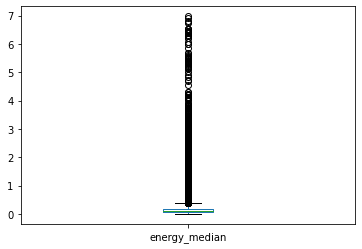

------------------------------------------------------------
energy_mean
AxesSubplot(0.125,0.125;0.775x0.755)


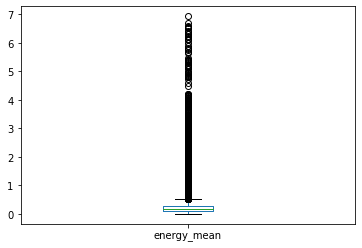

------------------------------------------------------------
energy_max
AxesSubplot(0.125,0.125;0.775x0.755)


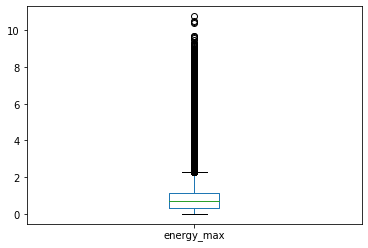

------------------------------------------------------------
energy_count
AxesSubplot(0.125,0.125;0.775x0.755)


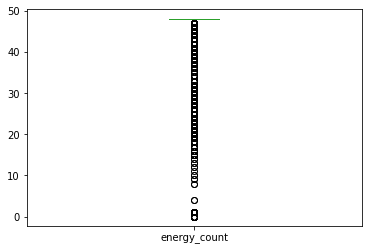

------------------------------------------------------------
energy_std
AxesSubplot(0.125,0.125;0.775x0.755)


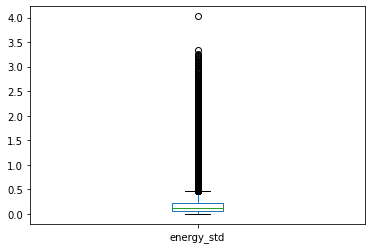

------------------------------------------------------------
energy_sum
AxesSubplot(0.125,0.125;0.775x0.755)


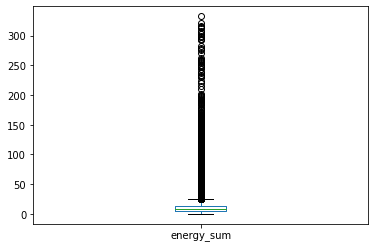

------------------------------------------------------------
energy_min
AxesSubplot(0.125,0.125;0.775x0.755)


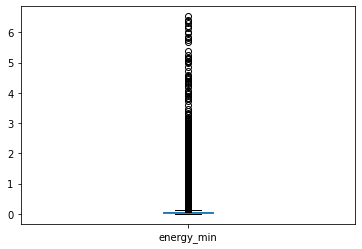

------------------------------------------------------------


In [ ]:
#Diagrama de Bigotes

for col in data_clean._get_numeric_data():
  print(col)
  print(data_clean[col].plot.box())
  plt.show()
  print('------' * 10)

In [ ]:
#El diagrama de bigotes de energy_sum nos muestra que consumo mayor a 50 puede ser un outlier. (el 90% de mis datos va a ser 40)

In [ ]:
#Elegir el rango adecuado de analisis (No medidores instalados vs año

In [ ]:
stats = data_clean.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
energy_median,3510403.0,0.158739,0.170186,0.0,0.067000,0.114500,0.191000,6.970500,0.124000
energy_mean,3510403.0,0.211730,0.190846,0.0,0.098083,0.163292,0.262458,6.928250,0.164375
energy_max,3510403.0,0.834521,0.668316,0.0,0.346000,0.688000,1.128000,10.761000,0.782000
energy_count,3510433.0,47.803636,2.810982,0.0,48.000000,48.000000,48.000000,48.000000,0.000000
energy_std,3510433.0,0.172110,0.153187,0.0,0.068584,0.132315,0.228859,4.024569,0.160275
energy_sum,3510403.0,10.124143,9.128793,0.0,4.682000,7.815000,12.569000,332.556001,7.887000
energy_min,3510403.0,0.059626,0.087013,0.0,0.020000,0.039000,0.071000,6.524000,0.051000


In [ ]:
outliers = pd.DataFrame(columns=data_clean.columns)

for col in stats.index:
  iqr = stats.at[col, 'IQR']
  cutoff = iqr * 1.5
  lower = stats.at[col, '25%'] - cutoff
  upper = stats.at[col, '75%'] + cutoff
  results = data_clean[(data_clean[col] < lower) | (data_clean[col] > upper)].copy()
  results['Outlier'] = col
  outliers = outliers.append(results)

In [ ]:
outliers.head()

In [ ]:
outliers['Outlier'].value_counts()

energy_median    226075
energy_min       225410
energy_mean      202063
energy_sum       201571
energy_std       158524
energy_max       121627
energy_count      41081
Name: Outlier, dtype: int64

In [ ]:
#En este caso tengo en la columna energy_sum (201.571) valores atipicos sobre la muestra de 3.510.433. 

In [ ]:
data_clean.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [ ]:
#Preparar Columna de Day para manipulacion. 
data_clean['Date'] = pd.to_datetime(data_clean['day']
                            # , format='%d/%m/%Y'
                            # , dayfirst=True
                            )

In [ ]:
data_clean.head(2)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Date
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,2011-12-15
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,2011-12-16


In [ ]:
#Agregar columnas de Day, Month, Year, Q para analisis posterior
data_clean['Days'] = data_clean['Date'].dt.day
data_clean['Month'] = data_clean['Date'].dt.month
data_clean['Year'] = data_clean['Date'].dt.year
data_clean['Q'] = data_clean['Date'].dt.to_period(freq='Q')
data_clean.head(2)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Date,Days,Month,Year,Q
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,2011-12-15,15,12,2011,2011Q4
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,2011-12-16,16,12,2011,2011Q4


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   LCLid          object        
 1   day            object        
 2   energy_median  float64       
 3   energy_mean    float64       
 4   energy_max     float64       
 5   energy_count   int64         
 6   energy_std     float64       
 7   energy_sum     float64       
 8   energy_min     float64       
 9   Date           datetime64[ns]
 10  Days           int64         
 11  Month          int64         
 12  Year           int64         
 13  Q              period[Q-DEC] 
dtypes: datetime64[ns](1), float64(6), int64(4), object(2), period[Q-DEC](1)
memory usage: 375.0+ MB


In [ ]:
#Validar Elegir el mejor momento de tiempo para el analisis
data_clean_trimestre = data_clean.groupby('Q').agg({'LCLid': 'count'})

data_clean_trimestre

,LCLid
Q,
2011Q4,8523
2012Q1,67613
2012Q2,258286
2012Q3,436145
2012Q4,501536
2013Q1,492073
2013Q2,488353
2013Q3,484987
2013Q4,474818


In [ ]:
#Incoporando Rate de Implementacion
valores = data_clean_trimestre['LCLid'].values
valores_list = list(valores)
tope_max = len(valores_list)-1
ratio_implementacion = [((valores_list[i+1]-valores_list[i])/(valores_list[i+1])*100) for i in range(0,tope_max)]
ratio_implementacion.insert(0,0)
ratio_implementacion
data_clean_trimestre['ratio_implementacion'] = ratio_implementacion
data_clean_trimestre


,LCLid,ratio_implementacion
Q,,
2011Q4,8523,0.000000
2012Q1,67613,87.394436
2012Q2,258286,73.822429
2012Q3,436145,40.779787
2012Q4,501536,13.038147
2013Q1,492073,-1.923089
2013Q2,488353,-0.761744
2013Q3,484987,-0.694039
2013Q4,474818,-2.141663


In [ ]:
#Se identifica que durante el 2013 fue el pico de incorporacion de smarts meters, y finanilzando el 2013
#se empezo a desinstalar progresivamente los medidores? 

In [ ]:
#Se incorpora dataset de FechasEspeciales 
data_holydays = pd.read_csv('/content/drive/MyDrive/Data/uk_bank_holidays.csv')

In [ ]:
data_clean_holydays = data_holydays.copy()
data_clean_holydays['Date'] = pd.to_datetime(data_clean_holydays['Bank holidays']
                            # , format='%d/%m/%Y'
                            # , dayfirst=True
                            )

text_to_clean = data_clean_holydays['Type'].values
text_to_clean_list = list(text_to_clean)
text_cleaned = [(re.sub("\!|\'|\?","",i)) for i in text_to_clean_list ]
text_cleaned
data_clean_holydays['Holiday_UK'] = text_cleaned
data_clean_holydays

,Bank holidays,Type,Date,Holiday_UK
0,2012-12-26,Boxing Day,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday),2012-05-06,Queens Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day),2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday,2012-09-04,Easter Monday
7,2012-06-04,Good Friday,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day),2012-02-01,New Years Day (substitute day)
9,2013-12-26,Boxing Day,2013-12-26,Boxing Day


In [ ]:
#Seleccionar solo columa Date y Holiday_UK
data_select_holidays = data_clean_holydays.loc[::,['Date', 'Holiday_UK']]
data_select_holidays

,Date,Holiday_UK
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queens Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Years Day (substitute day)
9,2013-12-26,Boxing Day


In [ ]:
#0. Unir dias feriados a muestra
#Opcion 1

#Opcion3
data_clean = data_clean.set_index('Date').join(data_select_holidays.set_index('Date'), on='Date')
data_clean

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Days,Month,Year,Q,Holiday_UK
Date,,,,,,,,,,,,,,
2011-12-15,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,15,12,2011,2011Q4,NaN
2011-12-16,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,16,12,2011,2011Q4,NaN
2011-12-17,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064,17,12,2011,2011Q4,NaN
2011-12-18,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065,18,12,2011,2011Q4,NaN
2011-12-19,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066,19,12,2011,2011Q4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-24,MAC004977,2014-02-24,0.0950,0.118458,0.580,48,0.093814,5.686,0.052,24,2,2014,2014Q1,NaN
2014-02-25,MAC004977,2014-02-25,0.0675,0.084208,0.176,48,0.037107,4.042,0.046,25,2,2014,2014Q1,NaN
2014-02-26,MAC004977,2014-02-26,0.1080,0.120500,0.282,48,0.069332,5.784,0.046,26,2,2014,2014Q1,NaN


In [ ]:
#Consumo Energetico Vista Negocio
#Consumo por dia, mes, ano, dia feriado, 
#1. Seleccionando Muestra ano 2013
muestra_anual = data_clean[data_clean.loc[:, 'Year'] == 2013]
muestra_anual


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Days,Month,Year,Q,Holiday_UK
Date,,,,,,,,,,,,,,
2013-01-01,MAC000131,2013-01-01,0.1595,0.317208,0.899,48,0.268927,15.226,0.065,1,1,2013,2013Q1,New Years Day
2013-01-02,MAC000131,2013-01-02,0.1315,0.249750,0.831,48,0.250353,11.988,0.064,2,1,2013,2013Q1,NaN
2013-01-03,MAC000131,2013-01-03,0.1165,0.229208,0.783,48,0.230147,11.002,0.065,3,1,2013,2013Q1,NaN
2013-01-04,MAC000131,2013-01-04,0.1250,0.238458,0.821,48,0.248757,11.446,0.060,4,1,2013,2013Q1,Easter Monday
2013-01-05,MAC000131,2013-01-05,0.1395,0.158375,0.784,48,0.121843,7.602,0.061,5,1,2013,2013Q1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,MAC004977,2013-12-27,0.0805,0.107479,0.329,48,0.065699,5.159,0.041,27,12,2013,2013Q4,NaN
2013-12-28,MAC004977,2013-12-28,0.1000,0.120271,0.503,48,0.076282,5.773,0.054,28,12,2013,2013Q4,NaN
2013-12-29,MAC004977,2013-12-29,0.1120,0.166813,0.557,48,0.126472,8.007,0.046,29,12,2013,2013Q4,NaN


In [ ]:
#2. Consumo por dia y stats (Solo muestra del ano 2013)
consumo_clean_dia = muestra_anual.groupby('day').agg({'energy_sum': 'sum'})
consumo_clean_dia

,energy_sum
day,
2013-01-01,65269.368001
2013-01-02,66235.805000
2013-01-03,62832.506997
2013-01-04,62942.029998
2013-01-05,64568.032997
...,...
2013-12-27,59522.737996
2013-12-28,58067.169000
2013-12-29,61101.243995


In [ ]:
consumo_clean_dia.describe()

,energy_sum
count,365.000000
mean,53741.749626
std,10185.607487
min,40310.155999
25%,44673.781997
50%,50864.033001
75%,61953.629004
max,82650.492003


In [ ]:
#3. Consumo por mes y stats (Solo muestra del ano 2013)
consumo_clean_mes = muestra_anual.groupby('Month').agg({'energy_sum': 'sum'})
consumo_clean_mes

,energy_sum
Month,
1,2.155819e+06
2,1.898281e+06
3,2.034698e+06
4,1.627334e+06
5,1.479676e+06
6,1.337319e+06
7,1.321478e+06
8,1.285156e+06
9,1.374614e+06


In [ ]:
consumo_clean_mes.describe()

,energy_sum
count,1.200000e+01
mean,1.634645e+06
std,2.965187e+05
min,1.285156e+06
25%,1.365291e+06
50%,1.579308e+06
75%,1.865750e+06
max,2.155819e+06


In [ ]:
#4. Consumo por ano y stats (Solo muestra del ano 2013)
consumo_clean_ano = data_clean.groupby('Year').agg({'energy_sum': 'sum'})
consumo_clean_ano
#4. Consumo por Q y stats (Solo muestra del ano 2013)

,energy_sum
Year,
2011,1.038744e+05
2012,1.248867e+07
2013,1.961574e+07
2014,3.331543e+06


In [ ]:
consumo_clean_ano.describe()

,energy_sum
count,4.000000e+00
mean,8.884956e+06
std,8.871006e+06
min,1.038744e+05
25%,2.524626e+06
50%,7.910105e+06
75%,1.427044e+07
max,1.961574e+07


In [ ]:
#5. Consumo por Q y stats (Solo muestra del ano 2013)
consumo_clean_quarter = muestra_anual.groupby('Q').agg({'energy_sum': 'sum'})
consumo_clean_quarter


,energy_sum
Q,
2013Q1,6.088798e+06
2013Q2,4.444329e+06
2013Q3,3.981248e+06
2013Q4,5.101363e+06


In [ ]:
# Consumo en fechas especiales (solo muestra ano 2013)

In [ ]:
consumo_clean_holiday = muestra_anual.groupby('Holiday_UK').agg({'energy_sum': 'sum'})
consumo_clean_holiday

,energy_sum
Holiday_UK,
Boxing Day,59479.846003
Christmas Day,64006.147991
Early May bank holiday,42889.653000
Easter Monday,62942.029998
Good Friday,66136.130006
New Years Day,65269.368001
Spring bank holiday,45846.575997
Summer bank holiday,42010.849999


In [ ]:
consumo_clean_holiday.describe()

,energy_sum
count,8.000000
mean,56072.575124
std,10580.907516
min,42010.849999
25%,45107.345248
50%,61210.938000
75%,64321.952994
max,66136.130006


In [ ]:
#PasoFinal Exportaciones a CSV
#df.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/name_csv_file.csv')


#MuestraInstalacionMedidores y RatioInstalacion
data_clean_trimestre.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/instalacion_medidores.csv')

#DataTotal Clean y Feriados
data_clean.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/data_total.csv')

#MuestraAnual ano 2013
muestra_anual.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/data_total_ano2013.csv')


#ConsumoClientesDiario
consumo_clean_dia.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/consumo_clientes_dia.csv')


#ConsumoClientesMes
consumo_clean_mes.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/consumo_clientes_mes.csv')


#ConsumoClientesTrimestre
consumo_clean_quarter.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/consumo_clientes_trimestre.csv')


#ConsumoenFechasEspeciales(Dias del 2013)
consumo_clean_holiday.to_csv('/content/drive/MyDrive/Data/DataFinal/AnalisisEmpresa/consumo_clientes_holidays.csv')

